In [3]:
import os.path

import numpy as np

!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")

You should consider upgrading via the 'c:\users\yashd\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\yashd\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\yashd\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Loading the cleaned data

In [4]:
bank_additional_cleaned = pd.read_csv('bank_additional_cleaned.csv')
bank_additional_cleaned.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,PC1
0,56.0,housemaid,married,basic.4y,no,no,telephone,may,mon,261.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
1,57.0,services,married,high.school,no,no,telephone,may,mon,149.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
2,37.0,services,married,high.school,yes,no,telephone,may,mon,226.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
3,40.0,admin.,married,basic.6y,no,no,telephone,may,mon,151.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
4,56.0,services,married,high.school,no,yes,telephone,may,mon,307.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079


In [5]:
bank_additional_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37091 entries, 0 to 37090
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37091 non-null  float64
 1   job             37091 non-null  object 
 2   marital         37091 non-null  object 
 3   education       37091 non-null  object 
 4   housing         37091 non-null  object 
 5   loan            37091 non-null  object 
 6   contact         37091 non-null  object 
 7   month           37091 non-null  object 
 8   day_of_week     37091 non-null  object 
 9   duration        37091 non-null  float64
 10  campaign        37091 non-null  float64
 11  previous        37091 non-null  float64
 12  poutcome        37091 non-null  object 
 13  cons.price.idx  37091 non-null  float64
 14  cons.conf.idx   37091 non-null  float64
 15  y               37091 non-null  float64
 16  PC1             33551 non-null  float64
dtypes: float64(8), object(9)
memory

### EDA of numerical features

#### 1. Correlation matrix

<Axes: >

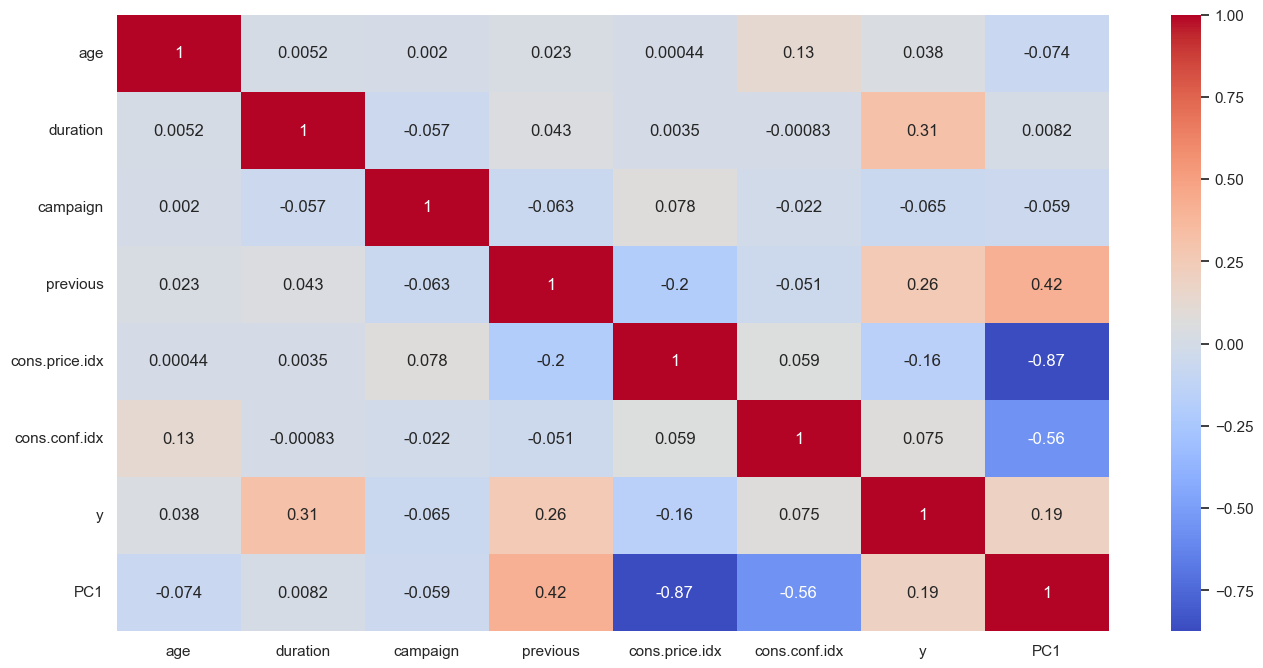

In [8]:
corr_matrix = bank_additional_cleaned.select_dtypes(exclude="object").corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)

### 2. Visualizing distributions for each category of target variable

In [11]:
fig = plt.figure(figsize=(25,20))
X_num_features = list(bank_additional_cleaned.select_dtypes(exclude="object").columns.values)
X_num_features.remove('y')

<Figure size 2500x2000 with 0 Axes>

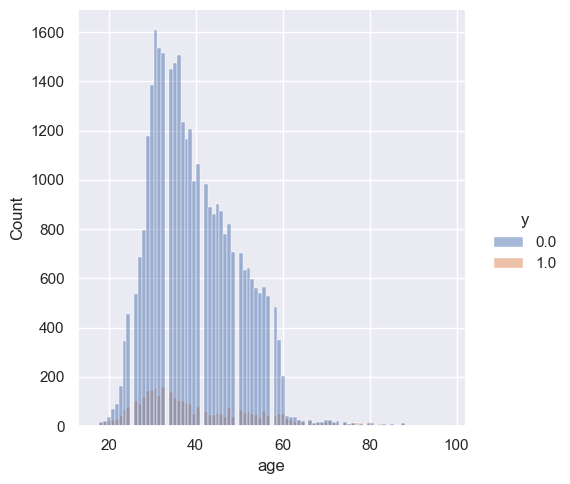

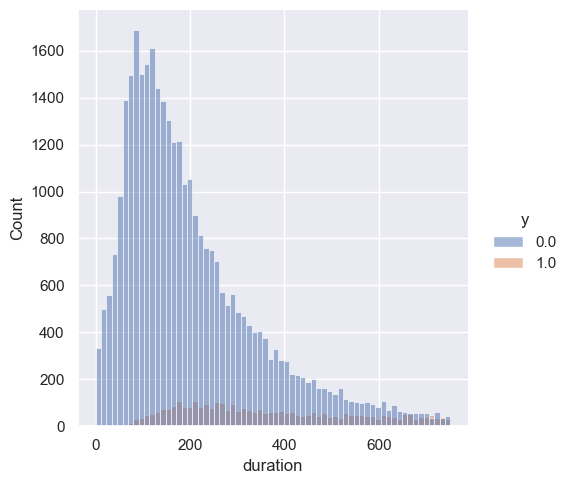

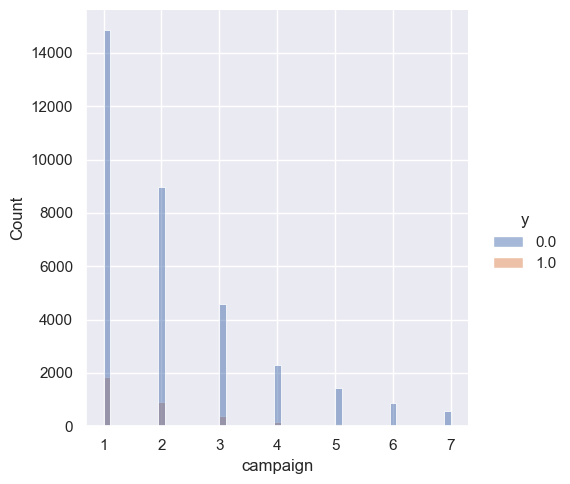

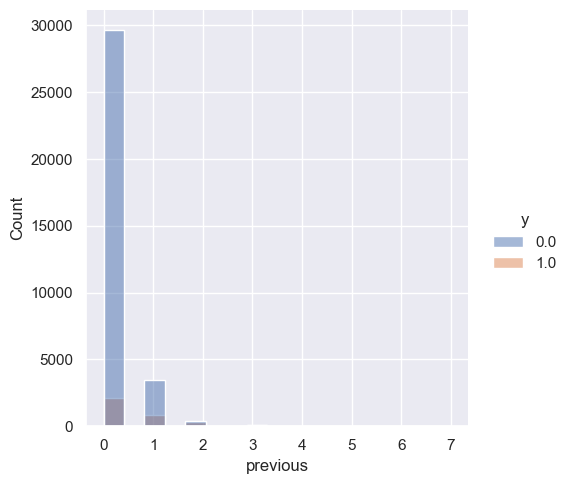

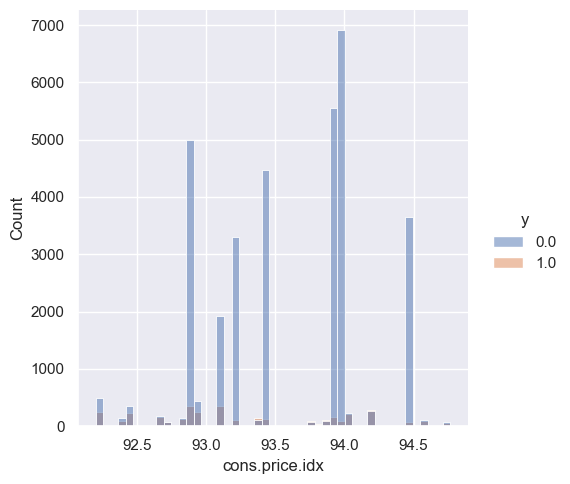

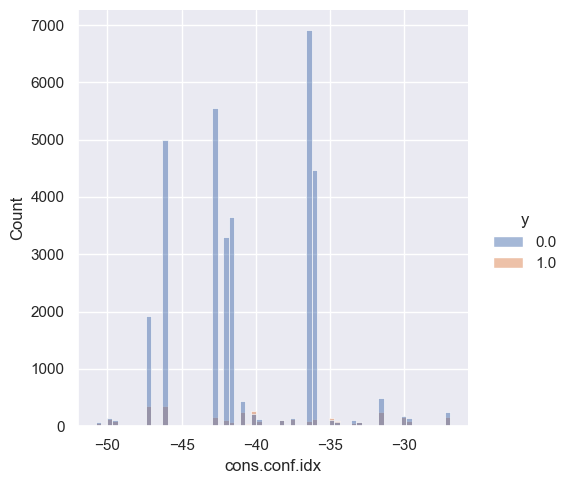

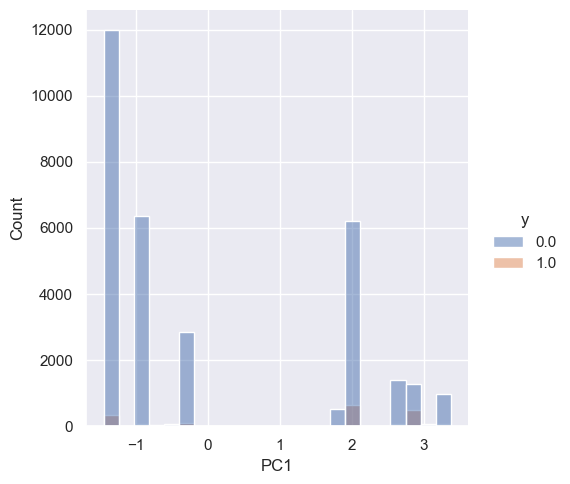

In [17]:
for index, feature in enumerate(X_num_features):
    fig.add_subplot(4,2,index+1).set_title(feature)
    sns.displot(data=bank_additional_cleaned, x=feature, hue='y')

In [19]:
print("Target imbalance")
print(f"{(bank_additional_cleaned['y'].sum()/ bank_additional_cleaned['y'].shape[0]) * 100}")

Target imbalance
9.296055646922435


#### Observations:

- Age: Most of the calls were made to people aged 25-50. Percentage of subscriptions seems to be approximately constant across all ages.
- Duration: As expected, percentage of subscriptions increases with the increase in call duration.
- Campaign: There seems to be almost no subscriptions for more than 4 contacts in the current campaign
- Previous: Data is heavily skewed to number of contacts = 1. Percentage of conversion seems to be consistent with overall value.
- cons.price.idx, cons.conf.index and PC1: There seems to be some correlation with target variable. But the trend is not clear, this may be clearer when coupled with month and year values.

### EDA of categorical features

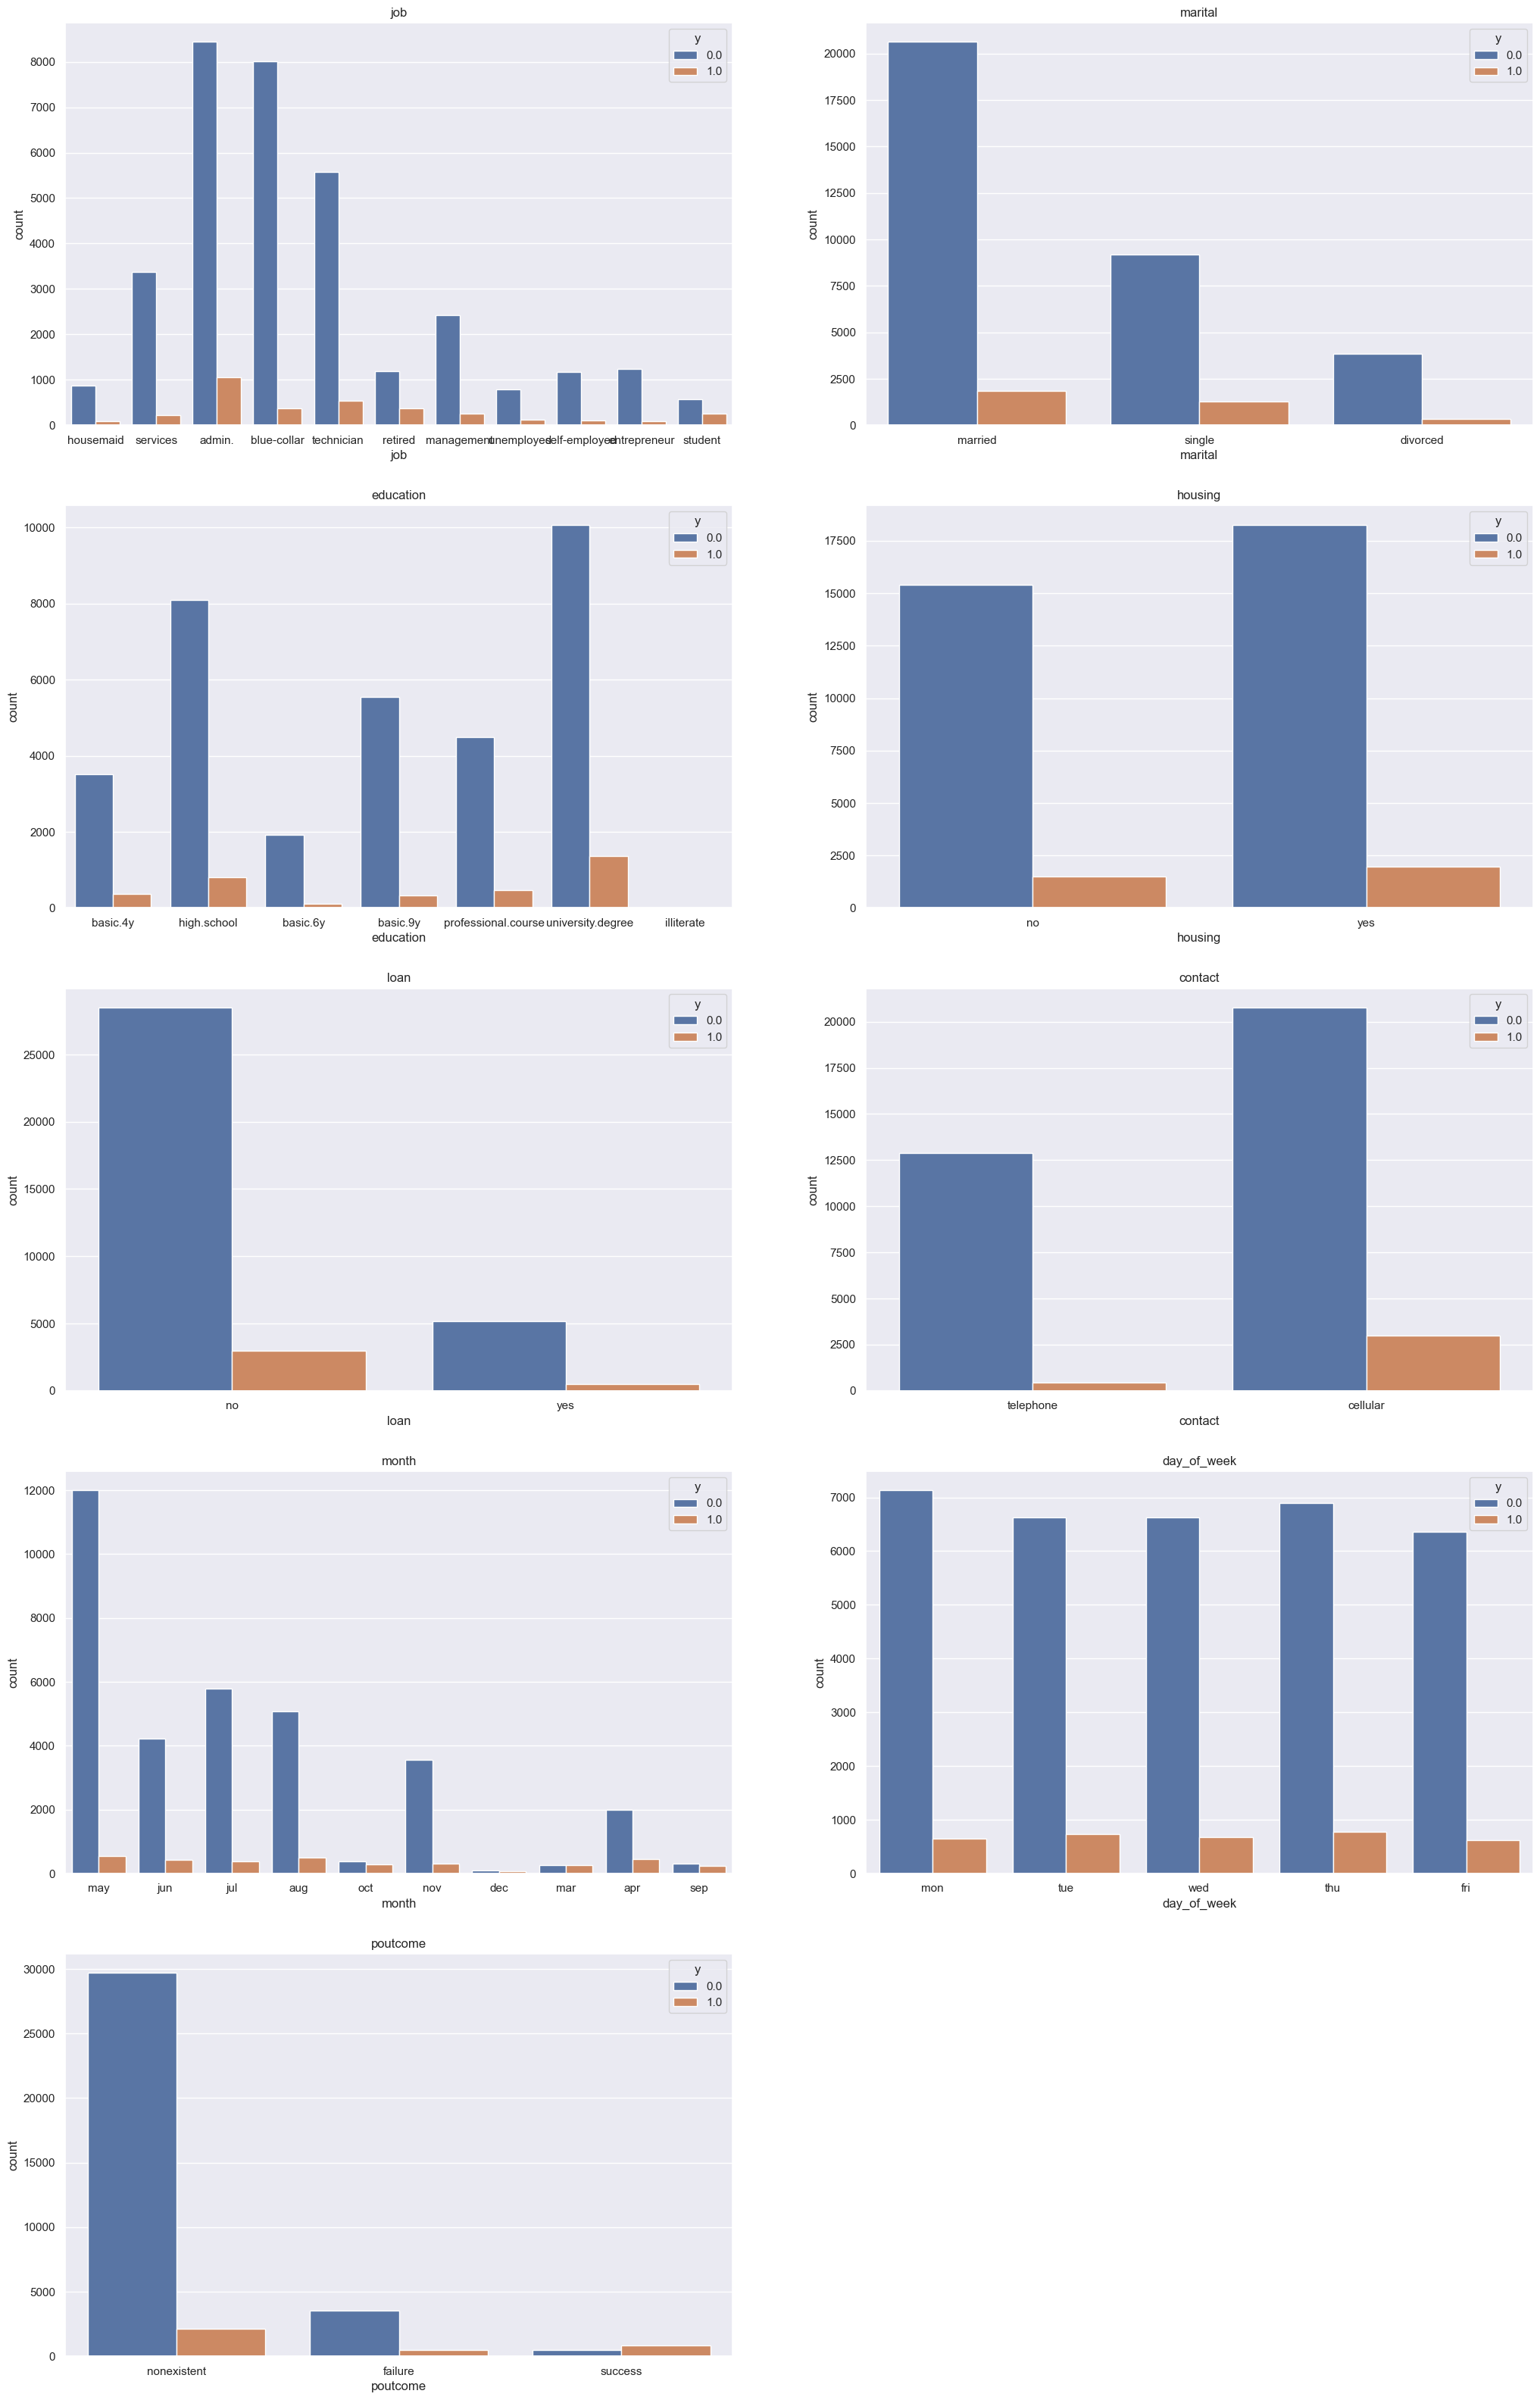

In [27]:
X_cat_features = bank_additional_cleaned.select_dtypes(include='object').columns.values
fig = plt.figure(figsize=(25,40))

for index, feature in enumerate(X_cat_features):
    fig.add_subplot(5,2,index+1).set_title(feature)
    sns.countplot(data=bank_additional_cleaned, x=feature, hue='y')

In [26]:
print("Percentage of subscriptions for each category")
print("=====================================================")
for feature in X_cat_features:
    print(feature)
    for category in bank_additional_cleaned[feature].unique():
        temp_df = bank_additional_cleaned.loc[bank_additional_cleaned[feature]==category]
        print(f"{category}: {(temp_df['y'].sum()/temp_df['y'].shape[0]) * 100} %")
    print("------------------------------------------------------------------------------")

Percentage of subscriptions for each category
job
housemaid: 9.062170706006324 %
services: 6.101978266926721 %
admin.: 11.114622840286557 %
blue-collar: 4.457687723480333 %
technician: 8.804312316236523 %
retired: 24.091778202676863 %
management: 9.22038980509745 %
unemployed: 13.37719298245614 %
self-employed: 8.091123330714847 %
entrepreneur: 5.998481397114654 %
student: 30.493827160493826 %
------------------------------------------------------------------------------
marital
married: 8.127617859370822 %
single: 12.133371548676793 %
divorced: 8.464849354375897 %
------------------------------------------------------------------------------
education
basic.4y: 9.375 %
high.school: 9.137911655614252 %
basic.6y: 5.438510534051935 %
basic.9y: 5.415531335149864 %
professional.course: 9.582408714948558 %
university.degree: 11.935991605456453 %
illiterate: 18.75 %
------------------------------------------------------------------------------
housing
no: 8.783062507413119 %
yes: 9.723664046

### Observations:
- job: 'admin','blue-collar' and 'technician' jobs were contacted most. 'Retired' and 'Student' categories gave the highest percentage of subscriptions
- marital: most of the people contacted were married. The percentage of subscriptions didn't seem to change much with marital status
- education: most of the people contacted had either 'university.degree' or 'high.school' as their highest level of education. Though, 'illiterate' customers gave the highest percentage of subscriptions
- housing: There is no imbalance observed with respect to housing. The percentage of subscription also seems to be constant.
- loan: Most of the people contacted didn't have a personal loan. People without personal loan did seem to be more likely to subscribe but the difference between the two categories is small.
- contact: most of the people were contacted through a cellphone. This did result in a significantly higher percentage of subscriptions.
- month: Most of the contacts were made in the second quarter. Some months gave a significantly higher percentage of subscriptions than other months, but the trend is not very clear and there may be other factors at play here.
- day_of_week: Number of contacts and percentage of subscriptions doesn't seem to change much with day of the week.
- poutcome: The outcome of previous campaigns was "nonexistent" for most of the contacts. Although, the success of previous campaigns did seem to positively impact the subscriptions of current campaign.